In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

plt.style.use('bmh')

Reading the csv file into a dataframe "dataSet" Also, let's try to get a view on the dataframe so formed

In [2]:
dataSet = pd.read_csv('./games.csv')
dataSet.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [3]:
dataSet.shape

(20058, 16)

In [4]:
dataSet.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

In [5]:
dataSet.isna().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

We see no null values in the dataSet, hence we can proceed further with the analysis Lets have a look into the data types of the columns of the dataframe

In [6]:
dataSet.dtypes

id                 object
rated                bool
created_at        float64
last_move_at      float64
turns               int64
victory_status     object
winner             object
increment_code     object
white_id           object
white_rating        int64
black_id           object
black_rating        int64
moves              object
opening_eco        object
opening_name       object
opening_ply         int64
dtype: object

In [7]:
dataSet.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

Some columns in the dataframe don't appear relevant to me in this analysis, so let's remove them from the dataframe

In [8]:
dataSet = dataSet.drop(['id','created_at','last_move_at','white_id','black_id','moves','opening_eco'],axis = 1)

In [9]:
dataSet

,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_name,opening_ply
0,False,13,outoftime,white,15+2,1500,1191,Slav Defense: Exchange Variation,5
1,True,16,resign,black,5+10,1322,1261,Nimzowitsch Defense: Kennedy Variation,4
2,True,61,mate,white,5+10,1496,1500,King's Pawn Game: Leonardis Variation,3
3,True,61,mate,white,20+0,1439,1454,Queen's Pawn Game: Zukertort Variation,3
4,True,95,mate,white,30+3,1523,1469,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...
20053,True,24,resign,white,10+10,1691,1220,Dutch Defense,2
20054,True,82,mate,black,10+0,1233,1196,Queen's Pawn,2
20055,True,35,mate,white,10+0,1219,1286,Queen's Pawn Game: Mason Attack,3
20056,True,109,resign,white,10+0,1360,1227,Pirc Defense,4


20058 rows × 9 columns

We see in the 'rated' column, some of the values are false, denoting some games played we unrated or casual games

Let's have a look at the number of such values and compare them

In [10]:
print('Unrated games count: ',dataSet[~dataSet['rated']]['rated'].count())
print('rated games count: ',dataSet[dataSet['rated']]['rated'].count())

Unrated games count:  3903
rated games count:  16155


Unrated games count:  3903
rated games count:  16155
We observe that a significantly higher number of rated games are played as compared to casual or unrated games

Hence, we can drop the rows with casual or unrated games

<Axes: >

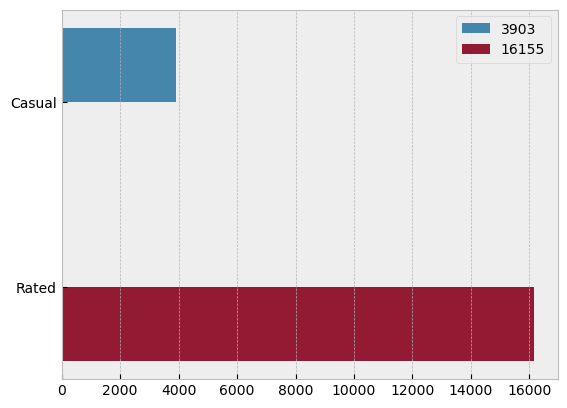

In [11]:
casualCount = dataSet[~dataSet['rated']]['rated'].count()
ratedCount = dataSet[dataSet['rated']]['rated'].count()
nar=np.array(['Casual','Rated'])
ar = np.array([casualCount,ratedCount])
sns.barplot(x=ar,y=nar,hue=ar)

The above plot shows the number of games for each rated and unrated category

In [12]:
dataSet = dataSet[dataSet['rated']]

Removing the casual games from the dataSet as they are not much relevant

In [13]:
dataSet.head()

,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_name,opening_ply
1,True,16,resign,black,5+10,1322,1261,Nimzowitsch Defense: Kennedy Variation,4
2,True,61,mate,white,5+10,1496,1500,King's Pawn Game: Leonardis Variation,3
3,True,61,mate,white,20+0,1439,1454,Queen's Pawn Game: Zukertort Variation,3
4,True,95,mate,white,30+3,1523,1469,Philidor Defense,5
6,True,33,resign,white,10+0,1520,1423,Blackmar-Diemer Gambit: Pietrowsky Defense,10


Let's find out the distribution of the victory_status

In [14]:
dataSet.groupby(['victory_status'])['rated'].count().sort_values(ascending=False)

victory_status
resign       8969
mate         5146
outoftime    1359
draw          681
Name: rated, dtype: int64

By observing the count of values for each type of victory_status, we see most of the match results ended by resignation, followed by checkmate, followeed by timeout and finally draw

<Axes: >

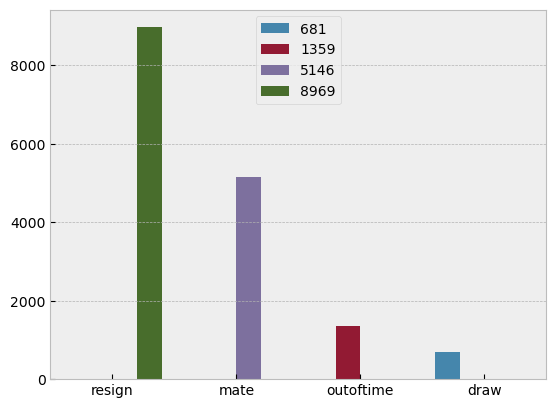

In [15]:
resign = dataSet[dataSet['victory_status'] == 'resign']['rated'].count()
mate = dataSet[dataSet['victory_status'] == 'mate']['rated'].count()
outoftime = dataSet[dataSet['victory_status'] == 'outoftime']['rated'].count()
draw = dataSet[dataSet['victory_status'] == 'draw']['rated'].count()

victoryCounts = np.array([resign,mate,outoftime,draw])
victoryTypes = np.array(['resign','mate','outoftime','draw'])

sns.barplot(x = victoryTypes,y = victoryCounts, hue = victoryCounts)

Let's now take a look at the data in the 'turns' column

In [16]:
dataSet['turns'].describe()

count    16155.000000
mean        61.962550
std         33.732775
min          1.000000
25%         39.000000
50%         57.000000
75%         80.000000
max        349.000000
Name: turns, dtype: float64

We see that the average number of moves played per game is approximately equal to 62

In [17]:
dataSet.groupby(['winner'])['rated'].count()

winner
black    7384
draw      719
white    8052
Name: rated, dtype: int64

<Axes: >

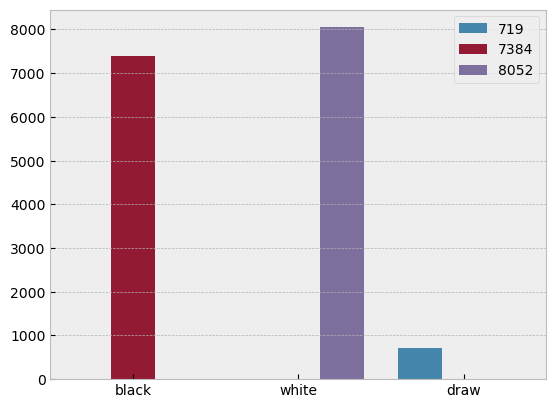

In [18]:
temp = dataSet['winner'].unique()
values = []
for string in temp:
    values.append(dataSet[dataSet['winner'] == string]['rated'].count())

sns.barplot(x = temp, y = values, hue = values)

From the above bar plot we can observe that white wins more than black but the difference is not very large

Also, most of the games generate a result,i.e, very few games are drawn

In [19]:
dataSet = dataSet.rename(columns={'increment_code':'time_control'})
dataSet

,rated,turns,victory_status,winner,time_control,white_rating,black_rating,opening_name,opening_ply
1,True,16,resign,black,5+10,1322,1261,Nimzowitsch Defense: Kennedy Variation,4
2,True,61,mate,white,5+10,1496,1500,King's Pawn Game: Leonardis Variation,3
3,True,61,mate,white,20+0,1439,1454,Queen's Pawn Game: Zukertort Variation,3
4,True,95,mate,white,30+3,1523,1469,Philidor Defense,5
6,True,33,resign,white,10+0,1520,1423,Blackmar-Diemer Gambit: Pietrowsky Defense,10
...,...,...,...,...,...,...,...,...,...
20053,True,24,resign,white,10+10,1691,1220,Dutch Defense,2
20054,True,82,mate,black,10+0,1233,1196,Queen's Pawn,2
20055,True,35,mate,white,10+0,1219,1286,Queen's Pawn Game: Mason Attack,3
20056,True,109,resign,white,10+0,1360,1227,Pirc Defense,4


In [20]:
dataSet.groupby(['time_control'])['rated'].count().sort_values(ascending=False).head(10)

time_control
10+0     6817
15+0      961
15+15     722
5+5       570
5+8       523
8+0       506
10+5      434
15+10     351
20+0      291
10+10     255
Name: rated, dtype: int64

From the above data count, we observe that '10 + 0' is the most played time control by users

Looking at the top 10 time controls played by the users, we observe that users tend to like to play shorter time format (mostly rapid time format)

Next, let's have a look at the column white_rating

We see a sudden spike in the plot at around 1500 rating mark

Let's see if such is the case with black_rating as well

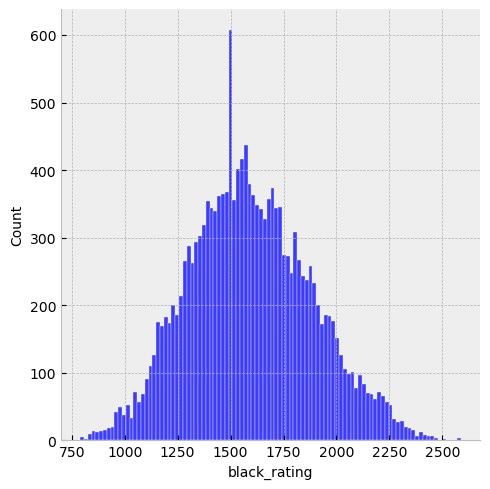

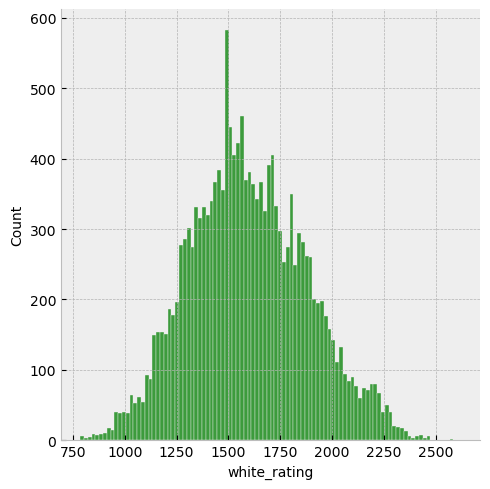

In [21]:
sns.displot(data=dataSet['black_rating'],bins = 100,color='blue')
sns.displot(data=dataSet['white_rating'],bins = 100,color='green')

The rating distribution seems similar in both white_rating and black_rating

In both the plots, we observe a sudden spike in plot

let's find out the numbers in both cases

In [22]:
dataSet.groupby(['white_rating'])['rated'].count().sort_values(ascending=False)

white_rating
1500    244
1696     39
1383     37
1547     33
1453     32
       ... 
2261      1
915       1
2124      1
912       1
2622      1
Name: rated, Length: 1458, dtype: int64

We observe that a significantly large number of users are rated 1500

Upon a little research, I found out that is the case because every user is given a default rating of 1500 upon creating a account in Lichess

Hence, most of the player ratings are around 1500

One more thing that can be seen is that the rating distribution is similar to a normal distribution (bell curve shape)

In [23]:
print('White average rating: ',dataSet['white_rating'].mean())
print('Black average rating: ',dataSet['black_rating'].mean())

White average rating:  1597.1020117610647
Black average rating:  1593.5031878675334


Upon comparing the average rating of black and white, we see that there is not a significant difference between them, despite of that the wins scored by white is much more compared to that of black.

This could imply that white may have some advantage over black. This could be in terms of average rating or just by the nature of the game.

Let's now have a look at the openings played by different players

In [24]:
dataSet['opening_name'].unique()

array(['Nimzowitsch Defense: Kennedy Variation',
       "King's Pawn Game: Leonardis Variation",
       "Queen's Pawn Game: Zukertort Variation", ...,
       "Queen's Indian Defense: Classical Variation |  Traditional Variation",
       "Queen's Gambit Declined: Slav |  Dutch Variation",
       'Sicilian Defense: Najdorf Variation |  Polugaevsky Variation'],
      dtype=object)

Let's find out the top 10 openings played by the players

In [25]:
dataSet.groupby(['opening_name'])['rated'].count().sort_values(ascending=False).head(10)

opening_name
Van't Kruijs Opening                             308
Sicilian Defense                                 283
Sicilian Defense: Bowdler Attack                 248
French Defense: Knight Variation                 229
Scotch Game                                      219
Scandinavian Defense: Mieses-Kotroc Variation    207
Queen's Pawn Game: Mason Attack                  187
Scandinavian Defense                             186
Horwitz Defense                                  184
Queen's Pawn Game: Chigorin Variation            180
Name: rated, dtype: int64

In [26]:
dataSet.corr()

C:\Users\idofg\AppData\Local\Temp\ipykernel_18592\2764850936.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataSet.corr()


,rated,turns,white_rating,black_rating,opening_ply
rated,NaN,NaN,NaN,NaN,NaN
turns,NaN,1.000000,0.147811,0.170288,0.055174
white_rating,NaN,0.147811,1.000000,0.709764,0.285029
black_rating,NaN,0.170288,0.709764,1.000000,0.271603
opening_ply,NaN,0.055174,0.285029,0.271603,1.000000


We see a pretty good correlation between white_rating and black_rating

This indicates that players paired by the server are closely rated

Following conclusions can be made from the above analysis:

1.Most of the people who play chess on Lichess like to play rated more than casual games
2.Average number of moves played per game is 62
3.White wins more games than Black in general
4.10 + 0 is the most popular time control among players
5.The player ratings follow a bell-curve shape(normal distribution)
6.Most of the players rating lies in the range 1300-1600, hence most chess courses should target the players in this range and below this range
7.Van't Kruijs ,Sicilian Defense, French Defense are the most played openings, hence courses can target these openings in particular
8.The players on the website are paired closely to their ratings by the server